<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 3:</span> Classification Algorithms</h1>
<hr>

Welcome to <span style="color:royalblue">Module 3: Classification Algorithms</span>!

In this module, we'll dive into a few more key concepts for machine learning. In particular, we want to introduce you to 4 algorithms that we'll be using in this project:
1. $L_1$-regularized logistic regression
2. $L_2$-regularized logistic regression
3. Random forests
4. Boosted trees

Just as in the previous project, we'll provide a gentle introduction to the **intuition and practical benefits** of each algorithm.

<br><hr id="toc">

### In this module...

In this module we'll walk through more key machine learning concepts, plus 4 effective algorithms for classification tasks.

1. [Binary classification](#binary)
2. [Toy example: noisy conditional](#conditional)
3. [Logistic Regression](#logistic)
3. [Regularized logistic algorithms](#regularized-logistic) - $L_1$-regularized and $L_2$-regularized
4. [Tree ensemble algorithms](#tree-ensembles) - Random Forests and Boosted Trees

**Tip:** Each section builds on the previous ones.

<br><hr>

### First, let's import libraries that we'll need

In [1]:
# print_function for compatibility with Python 3

# NumPy and Pandas
import numpy as np
import pandas as pd

# Matplotlib, and remember to display plots in the notebook
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

<span id="binary"></span>
# 1. Binary classification

Classification with 2 classes is so common that it gets its own name: **binary classification.** 


Just to be clear, let's take another look at the **target variable** for this problem.  First, let's look at it in the raw dataset (before we created the analytical base table).

In [7]:
# Print unique classes for 'status' and the first 5 observations for 'status' in the raw dataset
raw_df = pd.read_csv('project_files/employee_data.csv')
print(raw_df.status.unique())
raw_df.status.head()

['Left' 'Employed']


0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object

However, when we constructed our analytical base table, we converted the target variable from <code style="color:crimson">'Left' / 'Employed'</code> into <code style="color:crimson">1 / 0</code>.

In [11]:
# Print unique classes for 'status' and the first 5 observations for 'status' in the analytical base table
abt_df = pd.read_csv('project_files/analytical_base_table.csv')
print(abt_df.status.unique())
abt_df.status.head()

[1 0]


0    1
1    0
2    0
3    0
4    0
Name: status, dtype: int64

Which is the **positive** class? How about the **negative** class?

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold;">
[Back to Contents](#toc)
</p>

<span id="conditional"></span>
# 2 - Toy example: noisy conditional

We're going to use another toy example, just as we did in Project 1. 

This time, we're going to build models for a **noisy conditional**.


Let's create that dataset:

In [12]:
# Input feature
x = np.linspace(0, 1, 100)
# Noise
np.random.seed(555)
noise = np.random.uniform(-0.2,0.2, 100)

# Target variable
y = ((x + noise) > 0.5).astype(int)

We need to **reshape** <code style="color:steelblue">x</code> before moving on.
* That's because Scikit-Learn algorithms expect input features with 2 axes. However, right now, <code style="color:steelblue">x</code> only has one.

To make sure it has 2 axes, reshape it to be (100, 1) and name the the reshaped object capital <code style="color:steelblue">X</code>.

In [20]:
# Reshape x into X
X = x.reshape(100,1)
print(x[:5])
X[:5]

[ 0.          0.01010101  0.02020202  0.03030303  0.04040404]


array([[ 0.        ],
       [ 0.01010101],
       [ 0.02020202],
       [ 0.03030303],
       [ 0.04040404]])

Next, plot a **scatterplot** of the synthetic dataset.

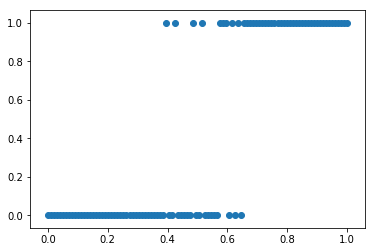

In [24]:
# Plot scatterplot of synthetic dataset
plt.scatter(X,y)

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold;">
[Back to Contents](#toc)
</p>

<span id="logistic"></span>
# 3. Logistic regression

First, we'll discuss **logistic regression**, which is the classification analog of linear regression.

Let's actually fit a linear regression model first.

In [26]:
# Import LinearRegression and LogisticRegression
from sklearn.linear_model import LinearRegression, LogisticRegression

Fit a linear model, make predictions, and plot them.

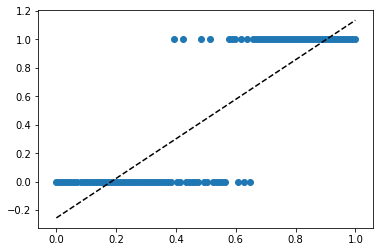

In [28]:
# Linear model
model = LinearRegression()
model.fit(X,y)
# Plot dataset and predictions
plt.scatter(X,y)
plt.plot(X, model.predict(X),'k--')
plt.show()

Next, let's see how **logistic regression** differs.

Let's fit a logistic regression model.

In [30]:
# Logistic regression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Next, let's call the <code style="color:steelblue">.predict()</code> function.

In [31]:
# predict()
pred = model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

Call <code style="color:steelblue">.predict_proba()</code> on the first 10 observations and display the results.

In [33]:
# predict_proba()
model.predict_proba(X[:10])

array([[ 0.89323552,  0.10676448],
       [ 0.88947376,  0.11052624],
       [ 0.88559644,  0.11440356],
       [ 0.88160121,  0.11839879],
       [ 0.87748575,  0.12251425],
       [ 0.87324782,  0.12675218],
       [ 0.86888519,  0.13111481],
       [ 0.86439572,  0.13560428],
       [ 0.85977734,  0.14022266],
       [ 0.85502804,  0.14497196]])

Get the predictions for the first observation.

In [35]:
# Class probabilities for first observation
model.predict_proba(X)[0]

array([ 0.89323552,  0.10676448])

Get the probability of **just the positive class** for the first observation.

In [40]:
# Positive class probability for first observation
model.predict_proba(X)[0][1]

0.10676448264067613

Use a simple list comprehension to extract a **list of only the predictions for the positive class**.

In [79]:
# Just get the second value for each prediction
pred = model.predict_proba(X[:10])
#print(pred[:,1])
[p[1] for p in pred]


[0.10676448264067613,
 0.11052623680433005,
 0.11440355742582128,
 0.11839879099901449,
 0.12251424555610411,
 0.12675218324295856,
 0.1311148125280929,
 0.13560428005260655,
 0.14022266213141368,
 0.14497195591931389]

Ok, let's fit and plot the logistic regression model.

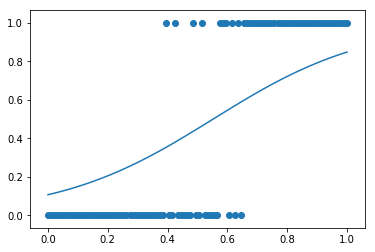

In [89]:
# Logistic regression
model = LogisticRegression()
model.fit(X,y)
# Predict probabilities
pred = model.predict_proba(X)

# Just get the second value (positive class) for each prediction
pos = [p[1] for p in pred]

# Plot dataset and predictions
plt.scatter(X, y)
plt.plot(X,pos)
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold;">
[Back to Contents](#toc)
</p>

<span id="regularized-logistic"></span>
# 4. Regularized logistic regression

Logistic regression has regularized versions that are analogous to those for linear regression.

Just to save ourselves from repeating the same code, let's write a quick helper function that:
1. Fits any classification model
2. Makes predictions
3. Extracts the positive probabilities
4. Plots them

In [90]:
def fit_and_plot_classifier(clf):
    # Fit model
    clf.fit(X,y)
    
    # Predict and take second value of each prediction
    pred = clf.predict_proba(X)
    pred = [p[1] for p in pred]
    # Plot
    plt.scatter(X,y)
    plt.plot(X, pred, 'k--')
    plt.show()
    
    # Return fitted model and predictions
    return clf, pred

Fit and plot the same logistic regression from earlier, this time using <code style="color:steelblue">fit_and_plot_classifier()</code>.

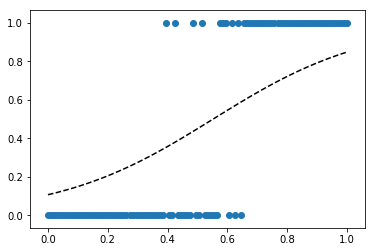

In [91]:
# Logistic regression
clf, pred = fit_and_plot_classifier(LogisticRegression())

Make the penalty **4 times stronger**.

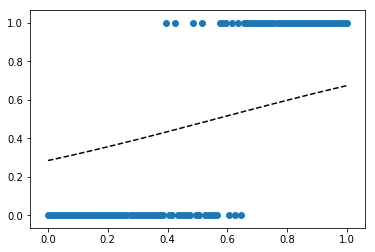

In [92]:
# More regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=0.25))

Next, make the penalty **4 times weaker**.

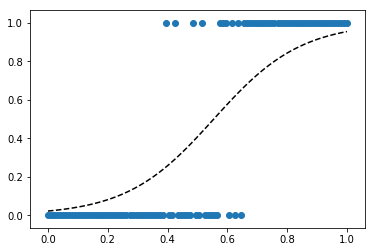

In [95]:
# Less regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=4))

To basically remove regularization, bump <code style="color:steelblue">C</code> way up.

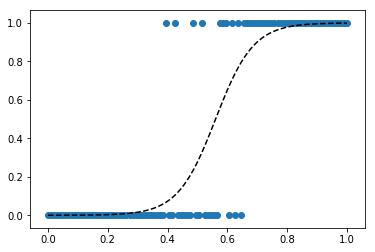

In [98]:
# Basically no regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=1000))

Set the **penalty type** to use $L_1$ regularization.

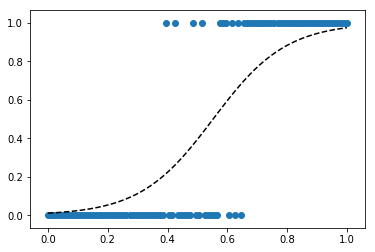

In [101]:
# L1 regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(penalty = 'l1'))

Initialize $L_1$-regularized and $L_2$-regularized logistic regression **separately** and **explicitly**.

In [102]:
# L1-regularized logistic regression
l1 = LogisticRegression(penalty = 'l1', random_state=123)

# L2-regularized logistic regression
l2 = LogisticRegression(penalty = 'l2', random_state=123)

Finally, use $L_1$-regularization with a 4 times weaker penalty.

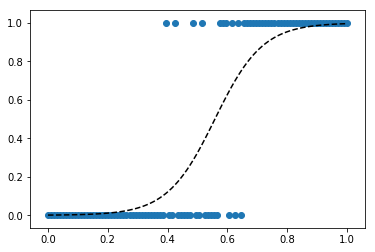

In [103]:
# L1 regularization with weaker penalty
clf, pred = fit_and_plot_classifier(LogisticRegression(penalty = 'l1', C=4))

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold;">
[Back to Contents](#toc)
</p>

<span id="tree-ensembles"></span>
# 5. Tree ensemble algorithms

The same tree ensembles we used for regression can be applied to classification. 

First, import the random forest classifier.

In [104]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

Apply it to this toy problem.

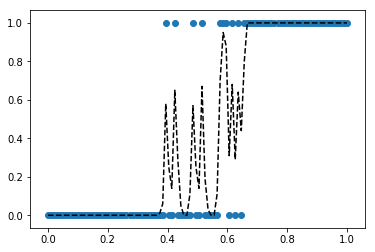

In [105]:
# Random forest classifier
clf, pred = fit_and_plot_classifier(RandomForestClassifier(n_estimators=100))

Next, import the boosted tree classifier.

In [107]:
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

And finally, apply it to this toy problem.

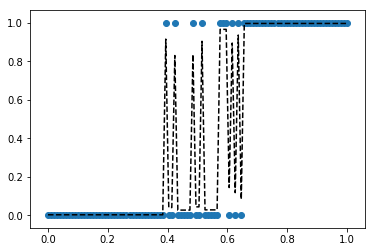

In [108]:
# Random forest classifier
clf, pred = fit_and_plot_classifier(GradientBoostingClassifier(n_estimators=100))

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold;">
[Back to Contents](#toc)
</p>

### Next Steps

Alright, that was a nice tour through some key theory and concepts, but let's get ready to dive back into the project!

As a reminder, here are a few things you did in this module:
* You learned some key terminology for binary classification, such as "positive" vs. "negative" classes.
* You saw how logistic regression can also be regularized.
* You played around with different settings for penalty strength.
* And you recruited 4 algorithms: $L_1$-Regularized Logistic, $L_2$-Regularized Logistic, Random Forests, and Boosted Trees.

Now that we've recruited our 4 candidate algorithms, it's time to see which one performs the best! In the next module, <span style="color:royalblue">Module 4: Model Training</span>, we'll plug these algorithms into the powerful modeling process you learned in Project 2.

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold;">
[Back to Contents](#toc)
</p>